# Practice Session 07: Hubs and authorities


# 1. Read mapping of codes to country names

In [ ]:
import csv
import gzip
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [ ]:
INPUT_NAMES_FILENAME = "trade-countries.csv.gz"
INPUT_TRADE_1980 = "trade_1980-flows.csv.gz"
INPUT_TRADE_2013 = "trade_2013-flows.csv.gz"

# Organisation for Economic Co-operation and Development
OECD = set(["AUS", "AUT", "BEL", "CAN", "CHL", "COL", "CZE", "DNK", "EST", "FIN", "FRA",
        "DEU", "GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", "KOR", "LVA", "LTU",
        "LUX", "MEX", "NLD", "NOR", "NZL", "POL", "CHE", "ESP", "GBR", "PRT", "SVK",
        "SVN", "SWE", "TUR", "USA"])

# Brazil, Russia, India, China, and South Africa
BRICS = set(["BRA", "RUS", "IND", "CHN", "ZAF"])

# COUNTRIES
COUNTRIES = OECD.union(BRICS)

In [ ]:
id2name = {} #Creamos el diccionario id2name

In [ ]:
# Open a compressed file for reading in text mode
with gzip.open(INPUT_NAMES_FILENAME, "rt") as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    # Iterate through records, each record is a dictionary
    for record in reader:
        id2name[record["code"]] = record["name"] #Key code. Devuelve el nombre que corresponde a la abreviacion de cada pais

In [ ]:
# LEAVE AS-IS

print(id2name["ZAF"])

South Africa


# 2. Read flows data into two graphs

In [ ]:
g1980 = nx.DiGraph()
# Open a compressed file for reading in text mode
with gzip.open(INPUT_TRADE_1980, "rt") as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    # Iterate through records, each record is a dictionary
    for record in reader:
        #Si amount no es void y hay algun valor, guardamos el valor en la variable amount, si no hay valor lo ponemos como 0.
        if(len(record["amount"])> 0): 
            amount = float(int(record["amount"]))
        else:
            amount = 0.0 
        #Pasamos el amount a millones, si el amount es superior a 1 millon entramos en el primer if
        if((round(amount/1000000)) > 0):
            #Si el pais 1 o el pais 2 pertenecen a OECD o a BRICS entramos en el if
            if(record["country1"] in OECD or record["country1"] in BRICS):
                if(record["country2"] in OECD or record["country2"] in BRICS) and record['country2'] != record['country1']:
                    #Miramos si la operacion es un import o un export y añadimos el enlace al grafo.
                    if(record["flow"] == "Import"):
                        g1980.add_edge(record["country2"], record["country1"], weight = round(amount/1000000))
                    elif(record["flow"] == "Export"):
                        g1980.add_edge(record["country1"], record["country2"], weight = round(amount/1000000))

In [ ]:
#Repetimos el proceso anterior pero para los datos del 2013
g2013 = nx.DiGraph()
# Open a compressed file for reading in text mode
with gzip.open(INPUT_TRADE_2013, "rt") as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    # Iterate through records, each record is a dictionary
    for record in reader:
        if(len(record["amount"])> 0):
            amount = float(int(record["amount"]))
        else:
            amount = 0.0
        if((round(amount/1000000)) > 0):
            if(record["country1"] in OECD or record["country1"] in BRICS):
                if(record["country2"] in OECD or record["country2"] in BRICS) and record['country2'] != record['country1']:
                    if(record["flow"] == "Import"):
                        g2013.add_edge(record["country2"], record["country1"], weight = round(amount/1000000))
                    elif(record["flow"] == "Export"):
                        g2013.add_edge(record["country1"], record["country2"], weight = round(amount/1000000))

In [ ]:
# LEAVE AS-IS

for exporter in ["BRA", "ZAF"]:
    for importer in ["FRA", "PRT"]:
        print("In 1980, {:s} ({:s}) exported to {:s} ({:s}) goods and services for {:,d} USD millions".format(
            exporter, id2name[exporter], importer, id2name[importer],
               g1980.get_edge_data(exporter, importer)["weight"]) )

        print("by 2013, it exported {:,d} USD millions".format(g2013.get_edge_data(exporter, importer)["weight"]))
        print("")
    

In 1980, BRA (Brazil) exported to FRA (France) goods and services for 99 USD millions
by 2013, it exported 372 USD millions

In 1980, BRA (Brazil) exported to PRT (Portugal) goods and services for 13 USD millions
by 2013, it exported 92 USD millions

In 1980, ZAF (South Africa) exported to FRA (France) goods and services for 100 USD millions
by 2013, it exported 89 USD millions

In 1980, ZAF (South Africa) exported to PRT (Portugal) goods and services for 5 USD millions
by 2013, it exported 12 USD millions



In [ ]:
def sum_weights(g, direction, weight_key):
    dic = {}
    for n in g.nodes():
        dic[n] = 0 #Inicializamos el diccionario a 0
    for u,v,d in g.edges(data = True):
        w = d[weight_key]
        if direction == "in":
            dic[v] += w #Si es un import, añadimos el weight al nodo de destino
        if direction == "out":
            dic[u] += w #Si es un export, añadimos el weight al nodo de origen
    return dic
#Creamos los diccionarios correspondientes y llamamos a la función creada para evitar repetir codigo.
exports1980 = {}
imports1980 = {}
exports2013 = {}
imports2013 = {}
exports1980 = sum_weights(g1980, "out", 'weight')
imports1980 = sum_weights(g1980, "in", 'weight')
exports2013 = sum_weights(g2013, "out",'weight')
imports2013 = sum_weights(g2013, "in", 'weight')

In [ ]:
# LEAVE AS-IS

for country in ['FRA', 'CHN']:
    print("{:s} exported {:,d} USD Million in 1980 and {:,d} USD Million in 2013 ({:.1f} times),".format(
        id2name[country], exports1980[country], exports2013[country], exports2013[country]/exports1980[country]
    ))
    print(" and imported {:,d} USD Million in 1980 and {:,d} USD Million in 2013 ({:.1f} times).".format(
        imports1980[country], imports2013[country], imports2013[country]/imports1980[country]
    ))
    print()

France exported 6,923 USD Million in 1980 and 39,326 USD Million in 2013 (5.7 times),
 and imported 7,951 USD Million in 1980 and 48,557 USD Million in 2013 (6.1 times).

China (People's Republic of) exported 715 USD Million in 1980 and 100,868 USD Million in 2013 (141.1 times),
 and imported 1,100 USD Million in 1980 and 49,216 USD Million in 2013 (44.7 times).



In [ ]:
# LEAVE AS-IS

sorted_countries = sorted(COUNTRIES)

flowsData = {
    'exp1980': [(exports1980[c] if c in exports1980 else 0) for c in sorted_countries],
    'imp1980': [(imports1980[c] if c in imports1980 else 0) for c in sorted_countries],
    'exp2013': [(exports2013[c] if c in exports2013 else 0) for c in sorted_countries], 
    'imp2013': [(imports2013[c] if c in imports2013 else 0) for c in sorted_countries],
}

flowsDF = pd.DataFrame(flowsData, index=sorted_countries)
flowsDF

# 3. Draw the exports graphs

In [ ]:
#Usamos el applet que se nos ha dado para realizar la función plotGraph
def plotGraph(g, exports):
    NODE_SIZE_MULTIPLIER = 0.1
    EDGE_WIDTH_MULTIPLIER = 0.4
    node_sizes = []
    for node in g.nodes():
        node_sizes.append(exports[node] * NODE_SIZE_MULTIPLIER)
    edge_widths = []
    for u, v, d in g.edges(data=True):
        weight = math.log(d['weight'])*EDGE_WIDTH_MULTIPLIER
        edge_widths.append(weight)
    pos = nx.spring_layout(g, iterations=100, weight="weight")
    nx.draw_networkx_nodes(g, pos, node_color="yellow", node_size=node_sizes)
    nx.draw_networkx_edges(g, pos, width=edge_widths, )
    _ = nx.draw_networkx_labels(g, pos)

In [ ]:
plotGraph(g1980, exports1980)

In [ ]:
plotGraph(g2013, exports2013)

Se puede observar como en el 1980 la mayoria de exportaciones eran entre todos los paises y solo luxemburgo tenia pocas exportaciones.
En cambio en el segundo grafo vemos como todo esta mas globalizado y todos los nodos tienen alto grado, ya no hay ningun nodo que tenga poca conectividad con los demas, todos exportan a todos sitios

# 4. Compute hubs and authorities

In [ ]:
def normalize(d):
  sum = 0
  #Sumamos todos los valores del diccionario y luego dividimos cada uno entre la suma de todos los valores
  for key in d:
    sum += d[key]
  for key in d:
    d[key]/=sum
  return d

In [ ]:
# LEAVE AS-IS

print(normalize({"a": 60, "b": 120, "c":20}))

{'a': 0.3, 'b': 0.6, 'c': 0.1}


In [ ]:
def hubs_authorities(g, weight_key="weight"):
  h = {}
  a = {}
  ITERATIONS = 100
  for n in g.nodes():
      h[n] = 1/g.number_of_nodes() #Inicializamos el valor de hub para todos los nodos como 1/N
  for i in range(ITERATIONS):
    for n in g.nodes():
      a[n] = 0
    for u, v, d in g.edges(data=True):
      w = d[weight_key]
      a[v] += (h[u]*w) #Creamos el authority sumando weight veces el valor de hub del nodo de origen segun corresponda para cada nodo
    a = normalize(a) #Normalizamos a
    for n in g.nodes():
      h[n] = 0
    for u, v, d in g.edges(data=True):
      w = d[weight_key] 
      h[u] += (a[v]*w) #Creamos el hub sumando weight veces el valor de authority del nodo de destino segun corresponda para cada nodo
    h = normalize(h) #Normalizamos h

  return h,a

In [ ]:

# LEAVE AS-IS
# Execution should be very fast (a few seconds maximum)

print("Computing for 1980")
(h1980,a1980) = hubs_authorities(g1980)

print("Computing for 2013")
(h2013,a2013) = hubs_authorities(g2013)

Computing for 1980
Computing for 2013


In [ ]:
# LEAVE AS-IS

flowsDF['h1980'] = pd.Series(h1980)
flowsDF['a1980'] = pd.Series(a1980)
flowsDF['h2013'] = pd.Series(h2013)
flowsDF['a2013'] = pd.Series(a2013)

flowsDF

In [ ]:
print("ORDENADO DE MANERA DESCENDENTE SEGUN SU HUB SCORE")
display(flowsDF.sort_values('h2013', ascending=False).head(5)) #Imprimimos los 5 nodos con mas valor de hub de 2013
print("ORDENADO DE MANERA DESCENDENTE SEGUN SUS EXPORTACIONES")
display(flowsDF.sort_values('exp2013', ascending=False).head(5)) #Imprimimos los 5 nodos con mas valor de exportacion de 2013

En el caso de arriba segun su hub score podemos observar el valor que cada pais tiene como hub, es decir como el que sus exportaciones son de mayor peso o calidad por asi decirlo. En cambio en el de abajo solo miramos el numero de exportaciones que ha hecho sin tener en cuenta el peso o la importancia de estas.

In [ ]:
print("ORDENADO DE MANERA DESCENDENTE SEGUN SU AUTHORITY SCORE")
display(flowsDF.sort_values('a2013', ascending=False).head(5)) #Imprimimos los 5 nodos con mas valor de authority de 1980
print("ORDENADO DE MANERA DESCENDENTE SEGUN SUS IMPORTACIONES")
display(flowsDF.sort_values('imp2013', ascending=False).head(5)) #Imprimimos los 5 nodos con mas valor de importacion de 1980

Pasa lo mismo que en las dos ultimas listas, en el caso de arriba tenemos en cuenta la importancia o el valor de las importaciones. En el caso de abajo solo tenemos en cuenta quien mas ha importado.

# 5. Comparison of hub/export, authority/import scores

In [ ]:
def plot_scatter(a,b, x_label, y_label):
  # Create log-log plot
  plt.figure(figsize=(20,10))
  plt.loglog()
  plt.xlabel(x_label, {'size': '22'})
  plt.ylabel(y_label, {'size': '22'})
  # Add a diagonal line
  plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)
  # Do the scatter plot with texts
  for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})

In [ ]:
# LEAVE AS-IS: print plots for 2013

plot_scatter( exports2013, h2013, "Exports [Millions of USD]", "Hub score" )
plot_scatter( imports2013, a2013, "Imports [Millions of USD]", "Authority score" )

A mas arriba este en el grafico de mayor importancia seran las exportaciones que se realizan y a mas a la derecha mas exportaciones habra hecho, por lo que todos los que esten por debajo de la linea seran exportaciones de baja calidad en relacion a sus exportaciones, los que esten por encima sus exportaciones seran de buena calidad aunque no hagan muchas, lo mismo pasa en el grafico de abajo pero con las importaciones y su calidad

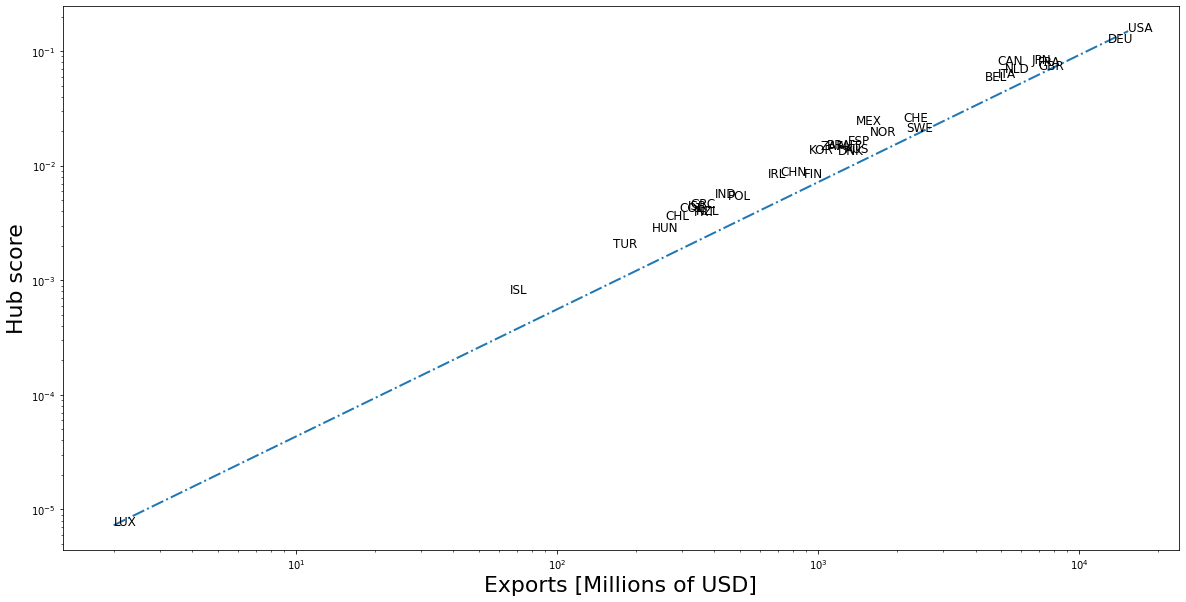

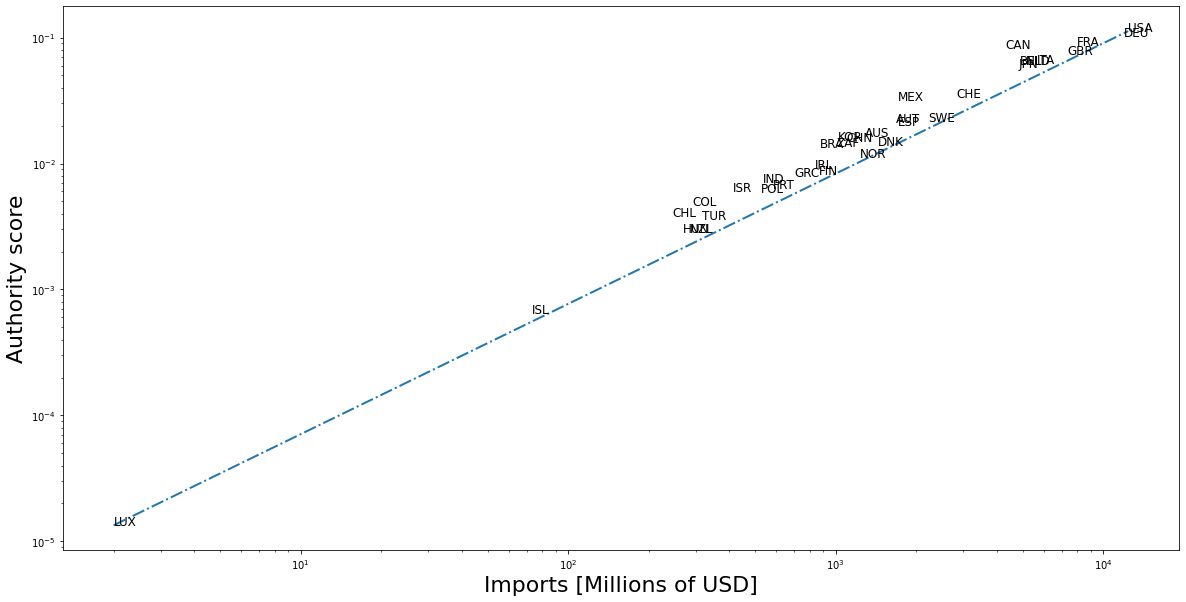

In [ ]:
# LEAVE AS-IS: print plots for 1980

plot_scatter( exports1980, h1980, "Exports [Millions of USD]", "Hub score" )
plot_scatter( imports1980, a1980, "Imports [Millions of USD]", "Authority score" )

La principal diferencia que se observa es que la mayoria de los nodos estan por encima de la diagonal por lo que con el tiempo parece que o ha habido pocos nodos que hayan conseguido mejorar su calidad lo suficiente o que en general ha habido menor calidad de exportacion y/o importacion de cada pais.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>